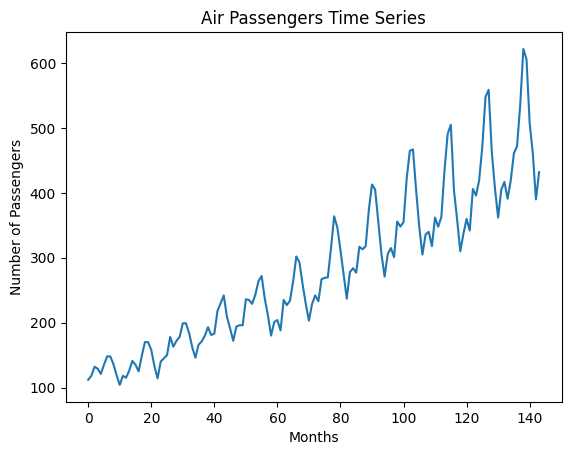

Epoch 1/100
132/132 - 7s - loss: 0.0139 - 7s/epoch - 54ms/step
Epoch 2/100
132/132 - 0s - loss: 0.0116 - 403ms/epoch - 3ms/step
Epoch 3/100
132/132 - 0s - loss: 0.0100 - 401ms/epoch - 3ms/step
Epoch 4/100
132/132 - 0s - loss: 0.0094 - 383ms/epoch - 3ms/step
Epoch 5/100
132/132 - 0s - loss: 0.0099 - 426ms/epoch - 3ms/step
Epoch 6/100
132/132 - 0s - loss: 0.0087 - 387ms/epoch - 3ms/step
Epoch 7/100
132/132 - 0s - loss: 0.0070 - 402ms/epoch - 3ms/step
Epoch 8/100
132/132 - 0s - loss: 0.0063 - 384ms/epoch - 3ms/step
Epoch 9/100
132/132 - 0s - loss: 0.0045 - 423ms/epoch - 3ms/step
Epoch 10/100
132/132 - 0s - loss: 0.0033 - 497ms/epoch - 4ms/step
Epoch 11/100
132/132 - 0s - loss: 0.0036 - 475ms/epoch - 4ms/step
Epoch 12/100
132/132 - 1s - loss: 0.0039 - 541ms/epoch - 4ms/step
Epoch 13/100
132/132 - 1s - loss: 0.0036 - 522ms/epoch - 4ms/step
Epoch 14/100
132/132 - 0s - loss: 0.0039 - 381ms/epoch - 3ms/step
Epoch 15/100
132/132 - 0s - loss: 0.0034 - 402ms/epoch - 3ms/step
Epoch 16/100
132/132 

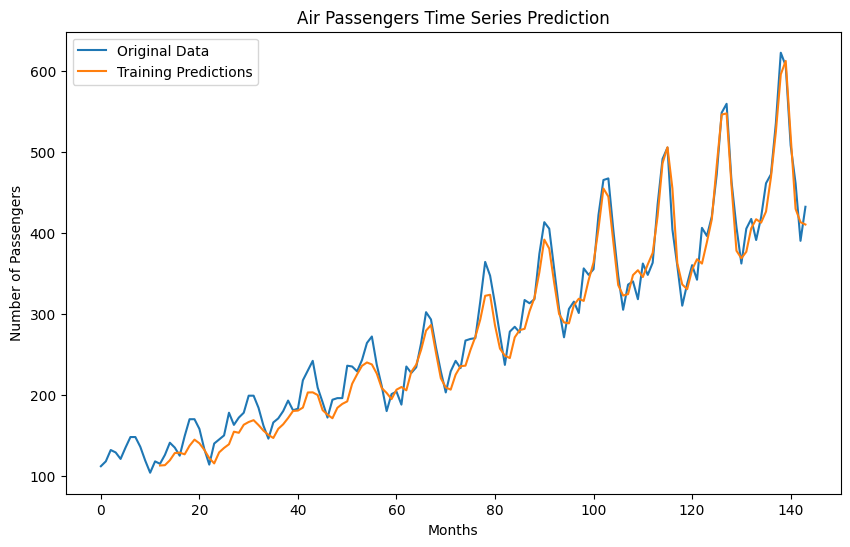

Mean Squared Error (MSE): 390.42480938038693


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.datasets import get_rdataset

# Load the Air Passengers dataset
air_passengers = get_rdataset('AirPassengers').data
data = air_passengers['value'].values.astype(float)

# Visualize the time series data
plt.plot(data)
plt.title('Air Passengers Time Series')
plt.xlabel('Months')
plt.ylabel('Number of Passengers')
plt.show()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1))

# Function to prepare data for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Create time series data with look-back
look_back = 12
X, Y = create_dataset(data_normalized, look_back)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build the LSTM model
model = Sequential([
    LSTM(50, input_shape=(look_back, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, Y, epochs=100, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X)

# Inverse transform to get original scale
train_predict = scaler.inverse_transform(train_predict)
Y_original = scaler.inverse_transform([Y])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data')
plt.plot(np.arange(look_back, len(train_predict) + look_back), train_predict[:, 0], label='Training Predictions')
plt.title('Air Passengers Time Series Prediction')
plt.xlabel('Months')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Calculate Mean Squared Error
mse = mean_squared_error(Y_original[0], train_predict[:, 0])
print(f"Mean Squared Error (MSE): {mse}")